<a href="https://colab.research.google.com/github/Honmaru0/Codenation-Aceleradev-2020---DataScience/blob/master/Desafio%20Pr%C3%A1tico/CODENATION_SISTEMA_DE_RECOMENDA%C3%87%C3%83O_PR%C3%89_PROCESSAMENTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ETAPA 1: PRÉ - PROCESSAMENTO DE DADOS

##Setando o diretório de trabalho para o local dos arquivos:




In [ ]:
cd /content/drive/My Drive/PROJETO FINAL - CODENATION

/content/drive/My Drive/PROJETO FINAL - CODENATION


##Importando as bibliotecas a serem utilizadas

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.set_option('display.max_rows', 200)
sn.set()

In [ ]:
mercado = pd.read_csv('estaticos_market.csv')
mercado.shape

(462298, 182)

In [ ]:
mercado.head(5)

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,...,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,NaN,NaN,NaN,NaN,True,8.0,0.0,0.0,NaN,NaN,NaN,False,RN,VERDE,ACIMA DE 1 ANO,...,3132172.8,3132172.8,119.0,26.0,100.0,0.0,NaN,1.0,4.0,6.0,5.0,3.0,4.0,2.0,NaN,1.0,NaN,1.0,25.0,NaN,NaN,26.0,19.166667,0.0,0.0,119.0,145.0,13.309195,93.266667,-0.933333,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,PI,CINZA,ATE 1 ANO,...,210000.0,210000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,2011-09-26,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,NaN,NaN,NaN,NaN,True,NaN,0.0,0.0,NaN,NaN,NaN,True,AM,AMARELO,ACIMA DE 1 ANO,...,50000.0,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,False,2012-04-25,False,True,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,NaN,NaN,NaN,NaN,True,NaN,0.0,0.0,NaN,NaN,NaN,False,AM,AMARELO,ACIMA DE 1 ANO,...,210000.0,210000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,False,False,False,2015-08-17,False,True,True,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False,NaN,NaN,NaN,NaN

De primeira vista, notou - se que a coluna unnamed é irrelevante para o modelo, visto que é a repetição do index de linhas, logo a mesma foi removida abaixo:

In [ ]:
mercado=mercado.drop(columns=mercado.columns[0])

Agora, para ter uma visão mais precisa dos tipos de dados que estão presentes, foi feito um dataframe contendo: NOME DA FEATURE, TIPO DE DADO E PORCENTAGEM DE DADOS FALTANTES.

In [ ]:
analise=mercado.isna().sum(axis=0)/len(mercado)
explorer=pd.DataFrame({'FEATURE':analise.index,
                      'TIPO DE DADO':mercado.dtypes,
                      '"%" NaN':analise.values*100})
explorer.reset_index(drop = True,inplace = True)
explorer.sort_values(by = ['"%" NaN'],ascending = False)

,FEATURE,TIPO DE DADO,"""%"" NaN"
59,qt_alteracao_socio_total,float64,100.000000
60,qt_alteracao_socio_90d,float64,100.000000
161,grau_instrucao_macro_desconhecido,float64,100.000000
61,qt_alteracao_socio_180d,float64,100.000000
62,qt_alteracao_socio_365d,float64,100.000000
86,coligada_mais_antiga_baixada,float64,99.970582
85,coligada_mais_nova_baixada,float64,99.970582
87,idade_media_coligadas_baixadas,float64,99.970582
25,vl_total_veiculos_antt,float64,99.961929
24,vl_total_tancagem,float64,99.939433


###1º Filtro: Eliminar features com muitos dados faltantes.

Dado que existem 181 variáveis, a ideia foi a remoção das features com mais de 25% de dados faltantes:

In [ ]:
explorer=explorer.loc[explorer['"%" NaN']<=25]
features = explorer['FEATURE'].tolist()
len(features)

45

Com isso, houve a redução de 181 para 50 features.

In [ ]:
mercado = mercado[features]
mercado.head(5)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,True,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,False,LESTE POTIGUAR,NATAL,True,2.0,2.0,0.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,NaN,0.0,0.0,NaN,PI,CINZA,ATE 1 ANO,9.0,BAIXA,False,CENTRO NORTE PIAUIENSE,TERESINA,True,1.0,1.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,2011-09-26,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,True,0.0,0.0,True,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,False,2012-04-25,False,True,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,True,0.0,0.0,False,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,False,False,False,2015-08-17,False,True,True,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False,True,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,27.0,ALTA,False,LESTE POTIGUAR,NATAL,True,1.0,1.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


A Feature de id precisa ser separada em um lugar separado do dataset utilizado. Além disso, a feature dt_situacao foi selecionada para ser removida, dada a sua grande variabilidade.

In [ ]:
#captar as empresas e sua localização no dataframe
ids = mercado['id'].values
#eliminar as colunas: id porque já está guardada em outra variável, e dt_situação por conta do problema de utilizá-la
mercado = mercado.drop(columns = ['id','dt_situacao'])


In [ ]:
#remover as features não aplicáveis para os próximos passos
features.remove('id')
features.remove('dt_situacao')

In [ ]:
mercado.head(5)

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,True,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,False,LESTE POTIGUAR,NATAL,True,2.0,2.0,0.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,NaN,0.0,0.0,NaN,PI,CINZA,ATE 1 ANO,9.0,BAIXA,False,CENTRO NORTE PIAUIENSE,TERESINA,True,1.0,1.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,True,0.0,0.0,True,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,False,False,True,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,True,0.0,0.0,False,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,False,False,False,False,True,True,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False,True,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,27.0,ALTA,False,LESTE POTIGUAR,NATAL,True,1.0,1.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


###2º Filtro: Eliminar features com má distribuição de dados.

Aqui, a ideia foi eliminar as features categóricas com uma grande quantidade de categorias ou que possuem uma distribuição desbalanceada.

A tabela abaixo foi usada apenas para ver se não há nenhuma variável com tipo de dado distinto do aplicável.

In [ ]:
pd.DataFrame({'TIPO DE DADO':mercado.dtypes})

,TIPO DE DADO
fl_matriz,bool
de_natureza_juridica,object
sg_uf,object
natureza_juridica_macro,object
de_ramo,object
setor,object
idade_empresa_anos,float64
idade_emp_cat,object
fl_me,bool
fl_sa,bool


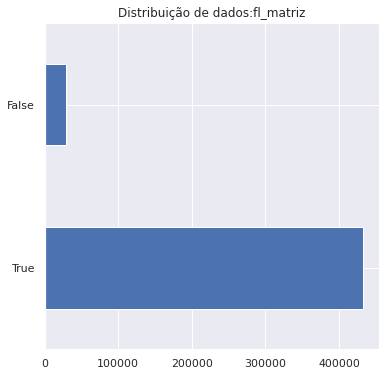

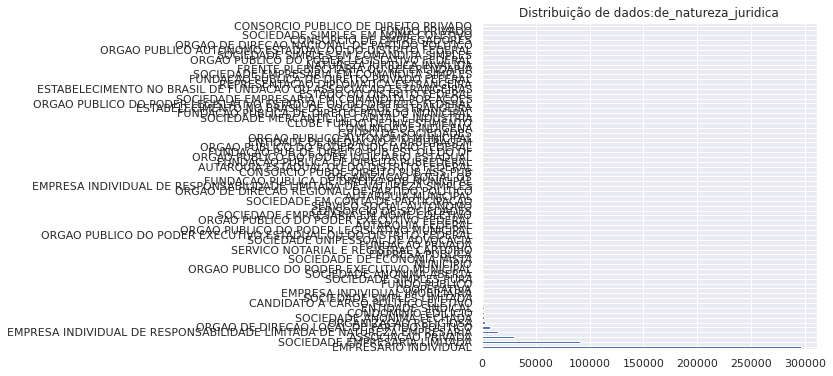

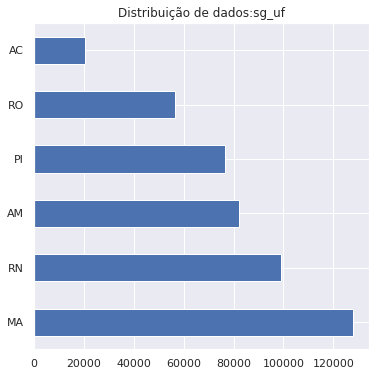

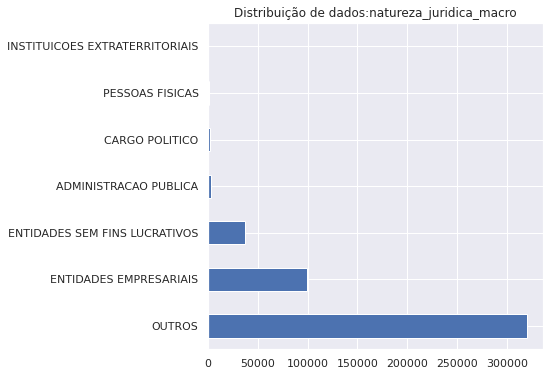

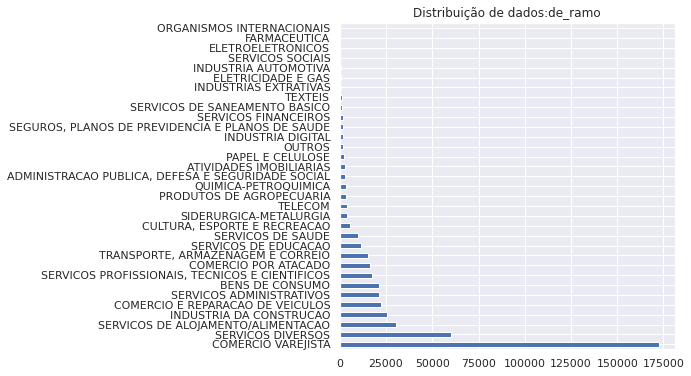

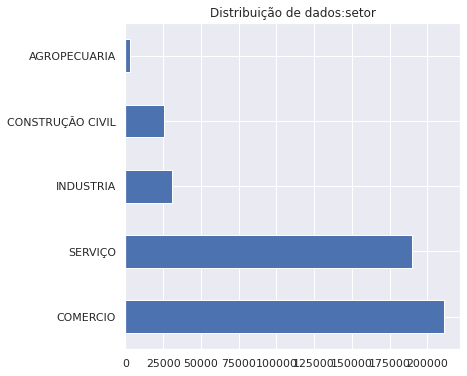

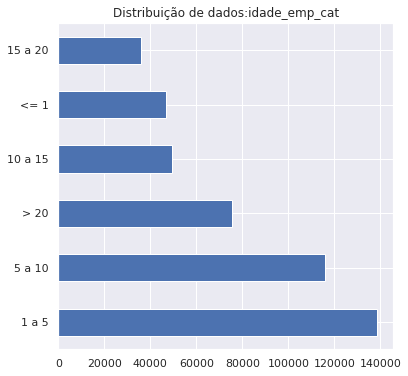

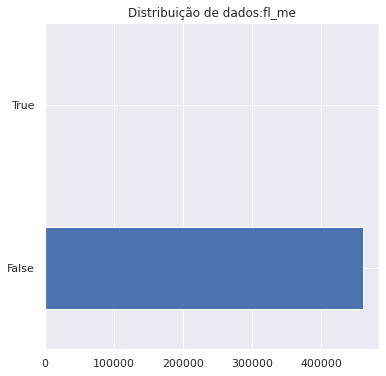

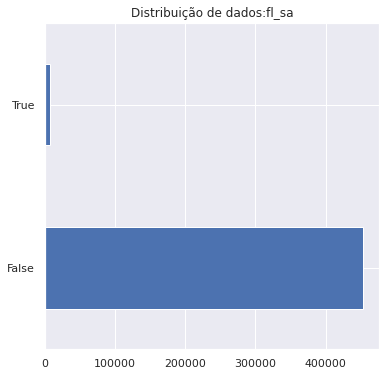

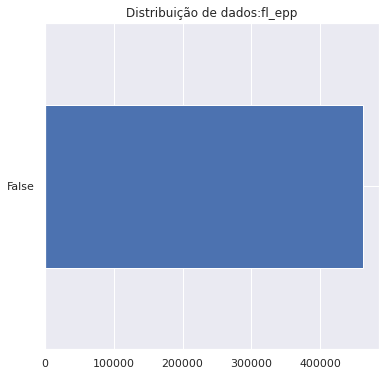

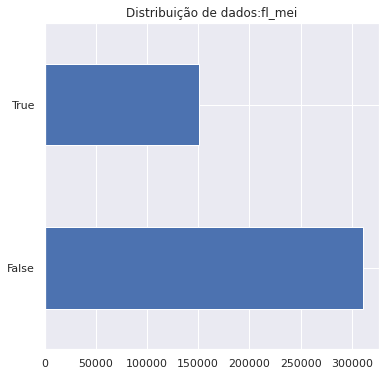

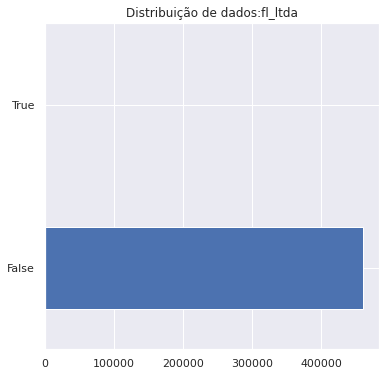

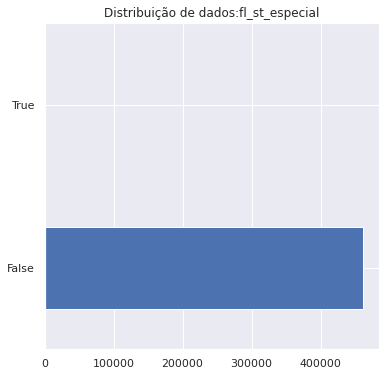

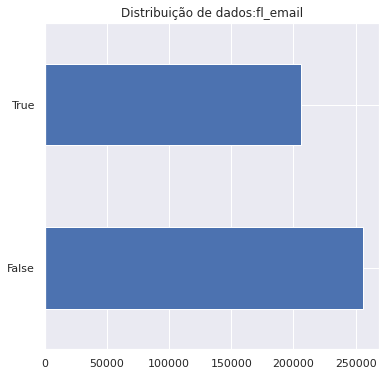

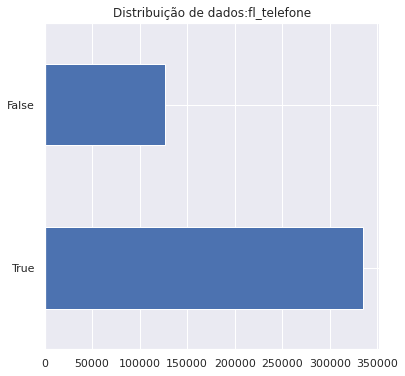

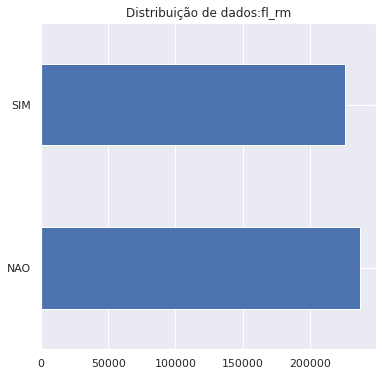

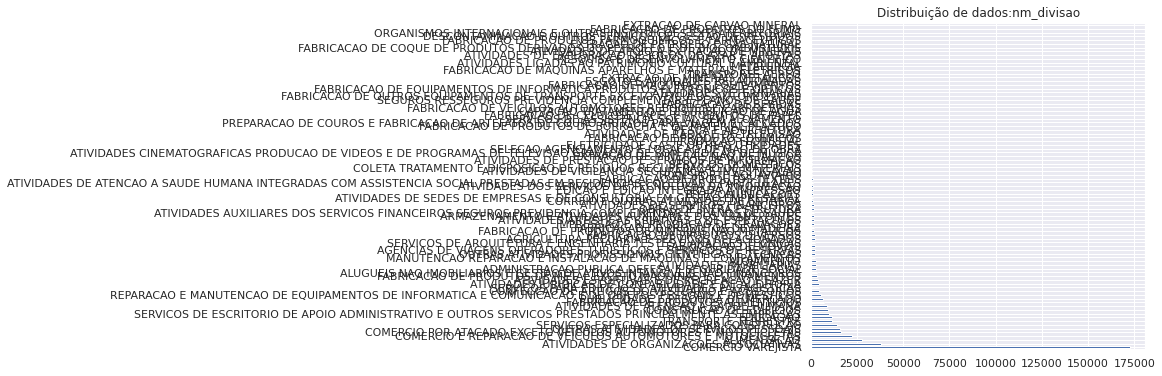

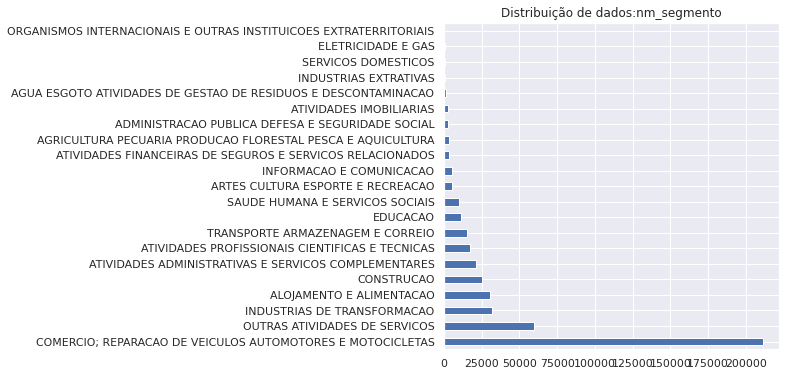

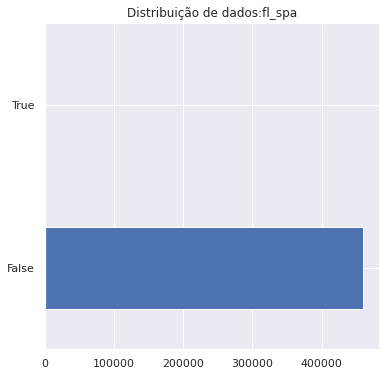

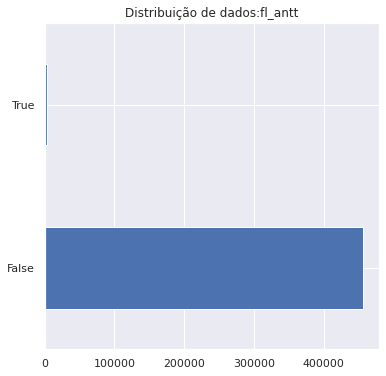

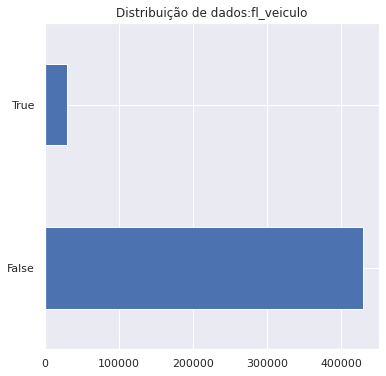

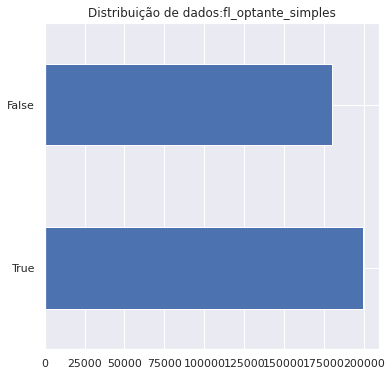

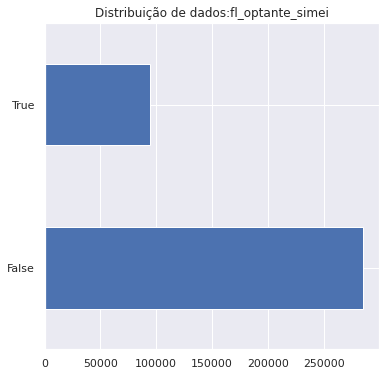

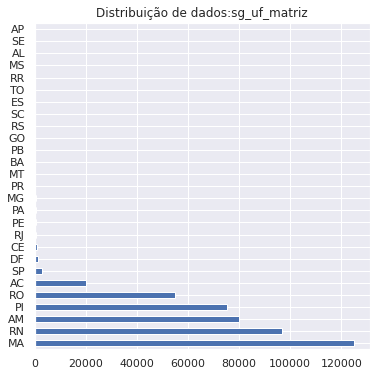

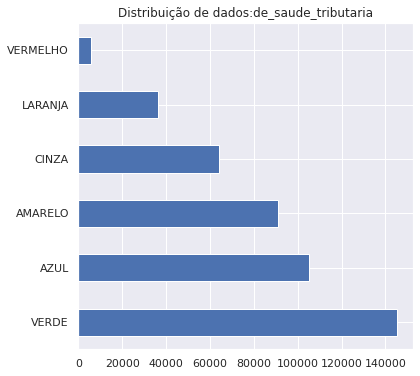

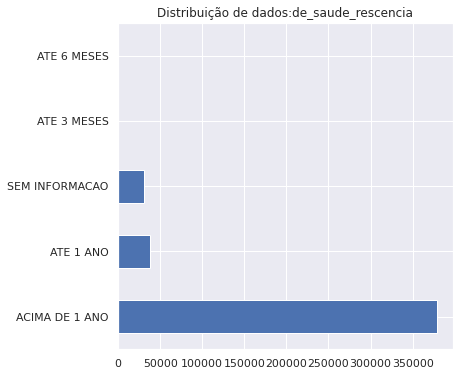

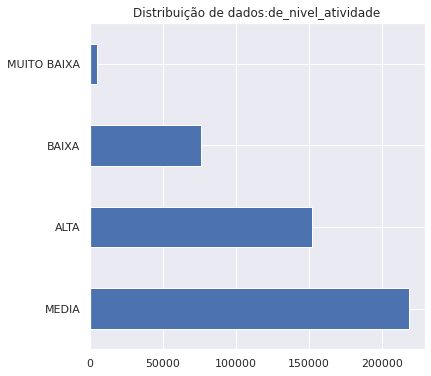

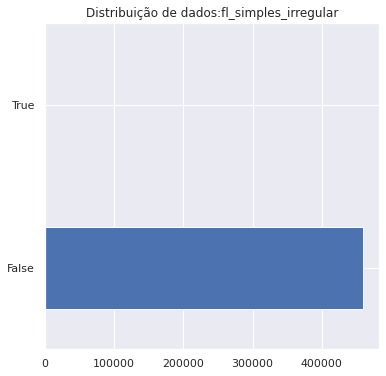

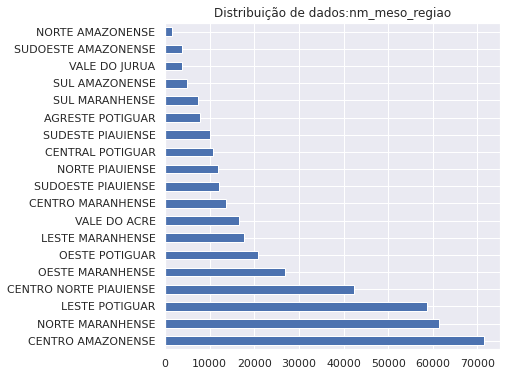

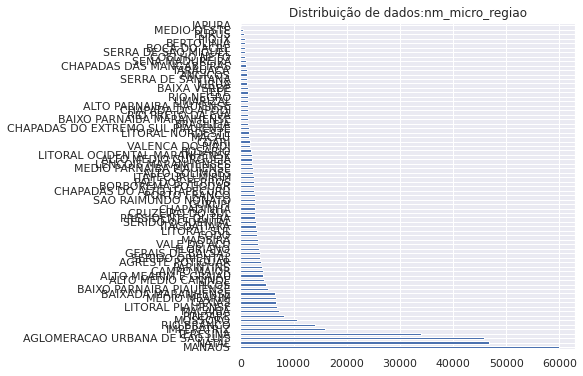

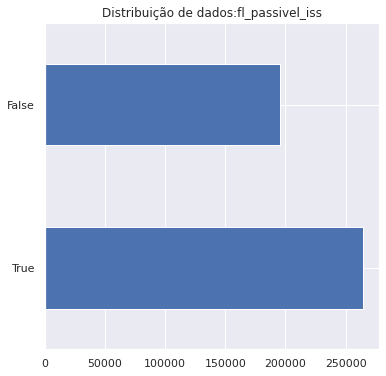

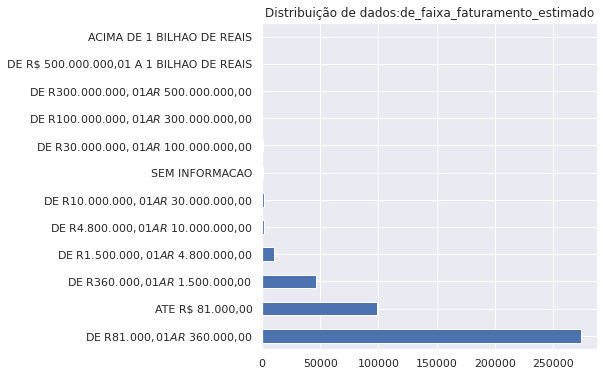

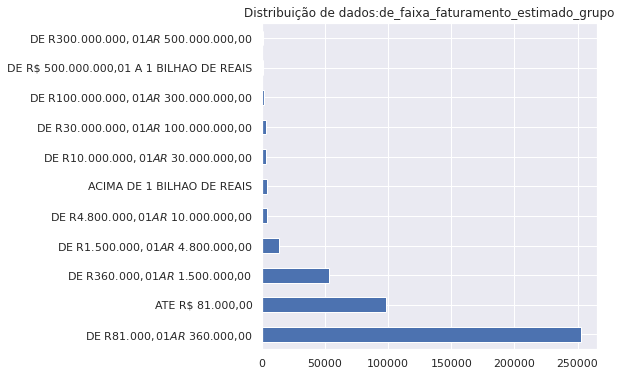

In [ ]:
#MELHORAR GRÁFICO PRA SUBPLOT MAIS BONITO
for coluna in features:
  if mercado[coluna].dtype =='object' or mercado[coluna].dtype =='bool':
    mercado[coluna].value_counts().plot(kind = "barh",figsize = (6,6))
    plt.title('Distribuição de dados:' + coluna)
    plt.show()

A partir dos gráficos de barra, pode-se obter que as variáveis que não possuem distribuição categórica aproveitável são:,fl_me, fl_sa,fl_epp, fl_ltda, fl_st_especial,fl_spa, fl_antt, fl_simples_irregular. Sendo assim, foram excluídas do dataset.

In [ ]:
feat_bad_dist = ['fl_me', 'fl_sa','fl_epp','fl_ltda', 'fl_st_especial','fl_spa', 'fl_antt', 'fl_simples_irregular']
mercado = mercado.drop(columns = feat_bad_dist)
#para remover da lista de features aplicadas
for coluna in feat_bad_dist:
  features.remove(coluna)

O próximo passo é avaliar as variáveis contínuas, de forma semelhante ao que foi feito acima, embora a mesma não será excluída caso haja grande variabilidade.

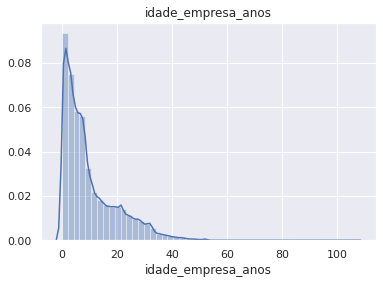

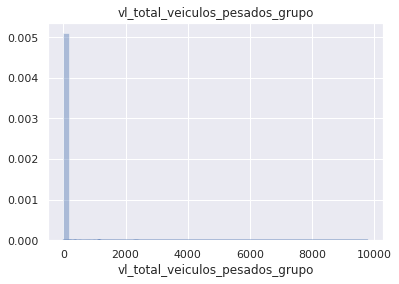

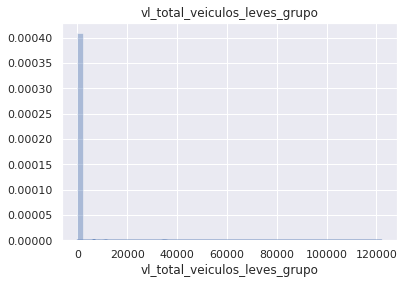

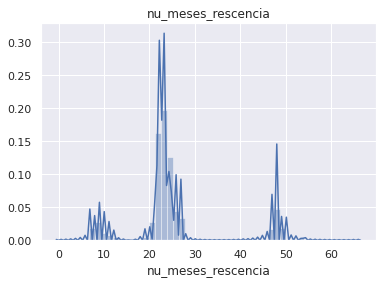

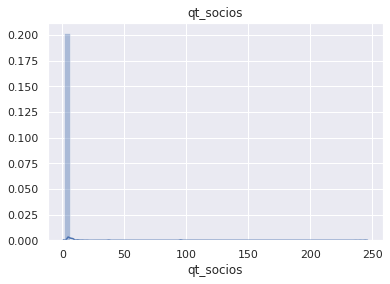

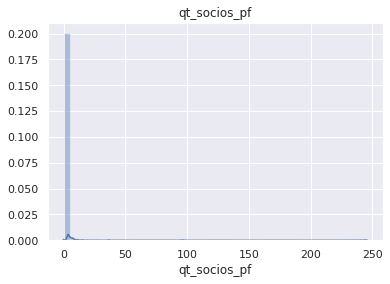

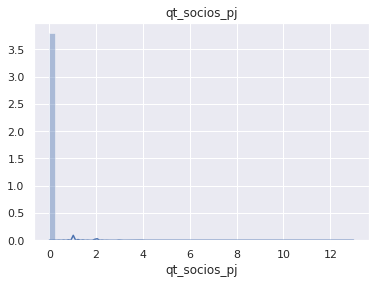

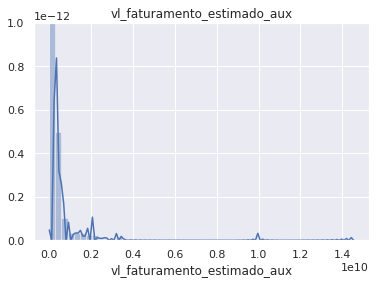

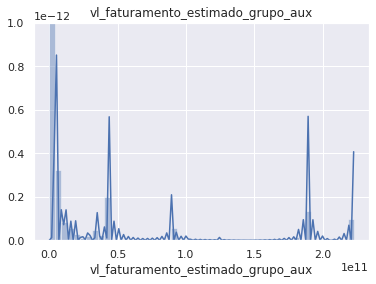

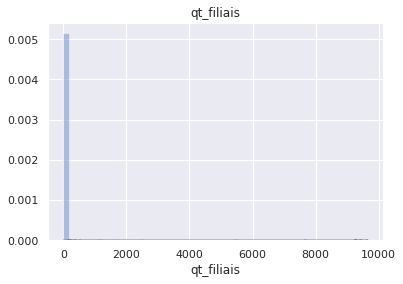

In [ ]:
for coluna in features:
  if mercado[coluna].dtype =='float64' or mercado[coluna].dtype =='int64':
    sn.distplot(mercado[coluna],hist = True)
    plt.title(coluna)
    plt.show()

Diante dos gráficos acima, as seguintes features serão excluídas:vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,qt_socios,qt_filiais, qt_socios_pj,qt_socios_pf.

In [ ]:
feat_bad_dist = ['vl_total_veiculos_pesados_grupo','vl_total_veiculos_leves_grupo','qt_socios','qt_filiais', 'qt_socios_pj','qt_socios_pf']
mercado = mercado.drop(columns = feat_bad_dist)
#para remover da lista de features aplicadas
for coluna in feat_bad_dist:
  features.remove(coluna)

In [ ]:
mercado.shape

(462298, 29)

Nº de features restantes:29

###3º - IMPUTAÇÃO DE DADOS FALTANTES

Estado atual das features:

In [ ]:
pd.DataFrame({'"%" NaN':mercado.isna().sum(axis=0)/len(mercado)*100}).sort_values(by ='"%" NaN', ascending = False)

,"""%"" NaN"
fl_optante_simples,17.891706
fl_optante_simei,17.891706
nm_micro_regiao,12.697005
nm_meso_regiao,12.697005
nu_meses_rescencia,9.793683
vl_faturamento_estimado_grupo_aux,5.951356
vl_faturamento_estimado_aux,5.951356
de_faixa_faturamento_estimado_grupo,5.951356
de_faixa_faturamento_estimado,5.951356
de_saude_rescencia,3.212430


A ideia é: para variáveis categóricas: Substituir pela moda, e para variáveis contínuas, substituir pela mediana.

In [ ]:
import statistics as stc

In [ ]:
for coluna in features:
  if mercado[coluna].dtype =='float64':
    mercado[coluna].fillna(stc.median(mercado[coluna]),inplace = True)
  if mercado[coluna].dtype =='object' or mercado[coluna].dtype =='bool':
    mercado[coluna].fillna(stc.mode(mercado[coluna]),inplace = True)

Com isso, todo o dataset está com os dados imputados. O próximo passo é aplicar a transformação das variáveis categóricas.

###4º ANÁLISE DE FEATURES CATEGÓRICAS

Sabe-se que há features categóricas que são sequenciais, e outras são nominais. A ideia é substituir as sequenciais por números e as nominais por variáveis *dummy*. 

In [ ]:
#coletando variáveis categóricas
categorical_data =[]
for coluna in features:
  if mercado[coluna].dtype =='object' or mercado[coluna].dtype =='bool':
    categorical_data.append(coluna)

Agora, a análise será manual. Feature por feature, avaliando os valores presentes.

In [ ]:
for coluna in categorical_data:
  print(mercado[coluna].value_counts())
  print('\n\n')

True     433232
False     29066
Name: fl_matriz, dtype: int64



EMPRESARIO INDIVIDUAL                                                     295756
SOCIEDADE EMPRESARIA LIMITADA                                              91231
ASSOCIACAO PRIVADA                                                         29694
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA     15183
ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO                                  7301
ORGANIZACAO RELIGIOSA                                                       2908
SOCIEDADE ANONIMA FECHADA                                                   2196
CONDOMINIO EDILICIO                                                         2084
ENTIDADE SINDICAL                                                           1763
CANDIDATO A CARGO POLITICO ELETIVO                                          1617
SOCIEDADE SIMPLES LIMITADA                                                  1316
EMPRESA INDIVIDUAL IMOBILIARIA              

BOOLS = fl_passivel_iss,fl_optante_simei,fl_optante_simples,fl_veiculo,fl_rm,fl_telefone,fl_email,fl_mei,fl_matriz
CATEGÓRICAS SEQUENCIAIS = de_faixa_faturamento_estimado_grupo, de_faixa_faturamento_estimado, de_nivel_atividade, de_saude_rescencia,de_saude_tributaria,idade_emp_cat
CATEGÓRICAS NÃO-SEQUENCIAIS = nm_micro_regiao, nm_meso_regiao,sg_uf_matriz,nm_segmento,nm_divisao, setor, de_ramo, natureza_juridica_macro, sg_uf, de_natureza_juridica,fl_rm

####4.1 - SUBSTITUIÇÃO NUMÉRICA PARA VARIÁVEIS CATEGÓRICAS BOOLEANAS

É apenas substituir o True por 1, e o False por 0

In [ ]:
bools = ['fl_passivel_iss','fl_optante_simei','fl_optante_simples','fl_veiculo','fl_telefone','fl_email','fl_mei','fl_matriz']
for coluna in bools:
  mercado[coluna] = mercado[coluna].replace(to_replace = [True,False],value = [1,0])

In [ ]:
mercado.head(5)

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_mei,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_veiculo,fl_optante_simples,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux
0,1,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,0,1,1,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,0,1,0,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,LESTE POTIGUAR,NATAL,1,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8
1,1,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,1,1,1,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,0,1,0,PI,CINZA,ATE 1 ANO,9.0,BAIXA,CENTRO NORTE PIAUIENSE,TERESINA,1,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0
2,1,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,1,0,1,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,0,1,1,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,CENTRO AMAZONENSE,MANAUS,1,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0
3,1,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,0,1,1,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,0,1,0,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,CENTRO AMAZONENSE,MANAUS,1,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0
4,1,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,0,1,1,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,0,1,0,RN,VERDE,ACIMA DE 1 ANO,27.0,ALTA,LESTE POTIGUAR,NATAL,1,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0


####4.2 - SUBSTITUIÇÃO NUMÉRICA PARA FEATURES CATEGÓRICAS SEQUENCIAIS

Agora, fazendo o mesmo para as features sequenciais:

In [ ]:
feat_seq = ['de_faixa_faturamento_estimado_grupo','de_faixa_faturamento_estimado','de_nivel_atividade', 'de_saude_rescencia','de_saude_tributaria','idade_emp_cat']

#####4.2.1 - de_faixa_faturamento

In [ ]:
seq = mercado[feat_seq[0]].value_counts().index.tolist()

É necessária uma sequência para as categorias acima. Será utilizada a ordem: 0,1,2...

In [ ]:
seq_num = [1,0,2,3,4,10,5,6,7,9,8]
for i in range(0,len(seq)):
  mercado[feat_seq[0]] = mercado[feat_seq[0]].replace(to_replace=seq[i],value = seq_num[i])

#####4.2.2 - de_faixa_faturamento_estimado

In [ ]:
seq = mercado[feat_seq[1]].value_counts().index.tolist()
seq

['DE R$ 81.000,01 A R$ 360.000,00',
 'ATE R$ 81.000,00',
 'DE R$ 360.000,01 A R$ 1.500.000,00',
 'DE R$ 1.500.000,01 A R$ 4.800.000,00',
 'DE R$ 4.800.000,01 A R$ 10.000.000,00',
 'DE R$ 10.000.000,01 A R$ 30.000.000,00',
 'SEM INFORMACAO',
 'DE R$ 30.000.000,01 A R$ 100.000.000,00',
 'DE R$ 100.000.000,01 A R$ 300.000.000,00',
 'DE R$ 300.000.000,01 A R$ 500.000.000,00',
 'DE R$ 500.000.000,01 A 1 BILHAO DE REAIS',
 'ACIMA DE 1 BILHAO DE REAIS']

Aqui há um problema: Existe uma categoria chamada 'SEM INFORMAÇÃO', equivalente a um NaN. A ideia aplicada será: fazer a lista de codigos numericos para as demais categorias, e aplicar a categoria central para a categoria acima.

In [ ]:
seq_num = [1,0,2,3,4,5,5,6,7,8,9,10]
for i in range(0,len(seq)):
  mercado[feat_seq[1]] = mercado[feat_seq[1]].replace(to_replace=seq[i],value = seq_num[i])

#####4.2.3 - de_nivel_atividade

In [ ]:
seq = mercado[feat_seq[2]].value_counts().index.tolist()
seq

['MEDIA', 'ALTA', 'BAIXA', 'MUITO BAIXA']

In [ ]:
seq_num = [2,3,1,0]
for i in range(0,len(seq)):
  mercado[feat_seq[2]] = mercado[feat_seq[2]].replace(to_replace=seq[i],value = seq_num[i])

#####4.2.4 - de_saude_rescencia

In [ ]:
seq = mercado[feat_seq[3]].value_counts().index.tolist()
seq

['ACIMA DE 1 ANO', 'ATE 1 ANO', 'SEM INFORMACAO', 'ATE 3 MESES', 'ATE 6 MESES']

O mesmo problema da categoria 'SEM INFORMAÇÃO'. A estratégia para resolver é a mesma aplicada anteriormente.


In [ ]:
seq_num = [3,2,2,0,1]
for i in range(0,len(seq)):
  mercado[feat_seq[3]] = mercado[feat_seq[3]].replace(to_replace=seq[i],value = seq_num[i])

#####4.2.5 - de_saude_tributária

In [ ]:
seq = mercado[feat_seq[4]].value_counts().index.tolist()
seq

['VERDE', 'AZUL', 'AMARELO', 'CINZA', 'LARANJA', 'VERMELHO']

Pelo dicionário de features, o valor máximo é o verde, e o mínimo é o vermelho. Com isso, se supõe que a ordem é: VERMELHO,LARANJA,AMARELO,AZUL e VERDE. O cinza equivaleria ao 'SEM INFORMAÇÃO', sendo dado igual equivalência para o amarelo, segundo a estratégia definida.

In [ ]:
seq_num = [4,3,2,2,1,0]
for i in range(0,len(seq)):
  mercado[feat_seq[4]] = mercado[feat_seq[4]].replace(to_replace=seq[i],value = seq_num[i])

#####4.2.6 - idade_emp_cat

In [ ]:
seq = mercado[feat_seq[5]].value_counts().index.tolist()
seq

['1 a 5', '5 a 10', '> 20', '10 a 15', '<= 1', '15 a 20']

In [ ]:
seq_num = [1,2,5,3,0,4]
for i in range(0,len(seq)):
  mercado[feat_seq[5]] = mercado[feat_seq[5]].replace(to_replace=seq[i],value = seq_num[i])

####4.3 - SUBSTITUIÇÃO NUMÉRICA PARA FEATURES CATEGÓRICAS NÃO-SEQUENCIAIS

Neste caso, a solução é aplicar a geração de variáveis dummies, que são variáveis categóricas que indicam a ausencia ou a presença de determinada categoria. O problema é que há mais memória sendo utilizada.

In [ ]:
feat_non_seq =['nm_micro_regiao', 'nm_meso_regiao','sg_uf_matriz','nm_segmento','nm_divisao', 'setor', 'de_ramo','natureza_juridica_macro', 'sg_uf', 'de_natureza_juridica','fl_rm']

In [ ]:
mercado_dummy = mercado[feat_non_seq]
mercado_dummy.head(5)

,nm_micro_regiao,nm_meso_regiao,sg_uf_matriz,nm_segmento,nm_divisao,setor,de_ramo,natureza_juridica_macro,sg_uf,de_natureza_juridica,fl_rm
0,NATAL,LESTE POTIGUAR,RN,CONSTRUCAO,CONSTRUCAO DE EDIFICIOS,CONSTRUÇÃO CIVIL,INDUSTRIA DA CONSTRUCAO,ENTIDADES EMPRESARIAIS,RN,SOCIEDADE EMPRESARIA LIMITADA,SIM
1,TERESINA,CENTRO NORTE PIAUIENSE,PI,ALOJAMENTO E ALIMENTACAO,ALIMENTACAO,SERVIÇO,SERVICOS DE ALOJAMENTO/ALIMENTACAO,OUTROS,PI,EMPRESARIO INDIVIDUAL,SIM
2,MANAUS,CENTRO AMAZONENSE,AM,TRANSPORTE ARMAZENAGEM E CORREIO,TRANSPORTE TERRESTRE,SERVIÇO,"TRANSPORTE, ARMAZENAGEM E CORREIO",OUTROS,AM,EMPRESARIO INDIVIDUAL,SIM
3,MANAUS,CENTRO AMAZONENSE,AM,OUTRAS ATIVIDADES DE SERVICOS,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,SERVIÇO,SERVICOS DIVERSOS,OUTROS,AM,EMPRESARIO INDIVIDUAL,SIM
4,NATAL,LESTE POTIGUAR,RN,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,SERVIÇO,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",OUTROS,RN,EMPRESARIO INDIVIDUAL,SIM


Pela grande quantidade de memória, foi visto que executar a dummificação neste passo não é valido, tendo que avaliar a distribuição isoladamente

In [ ]:
mercado_dummy = pd.get_dummies(data = mercado_dummy)

In [ ]:
mercado_dummy.shape

(462298, 347)

In [ ]:
del_dummy = []
for coluna in mercado_dummy.columns:
  mercado_dummy[coluna].value_counts()
  teste = mercado_dummy[coluna].value_counts()
  if teste[1]/teste[0] <= 0.1:
    del_dummy.append(coluna)

In [ ]:
len(del_dummy)

317

In [ ]:
mercado_dummy = mercado_dummy.drop(columns = del_dummy)


In [ ]:
mercado_dummy.shape

(462298, 30)

In [ ]:
mercado = mercado.drop(columns = feat_non_seq)

In [ ]:
mercado.shape

(462298, 18)

In [ ]:
mercado = pd.concat([mercado,mercado_dummy],axis =1)

In [ ]:
mercado.shape

(462298, 48)

In [ ]:
mercado.head(5)

,fl_matriz,idade_empresa_anos,idade_emp_cat,fl_mei,fl_email,fl_telefone,fl_veiculo,fl_optante_simples,fl_optante_simei,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,nm_micro_regiao_AGLOMERACAO URBANA DE SAO LUIS,nm_micro_regiao_MANAUS,nm_micro_regiao_NATAL,nm_meso_regiao_CENTRO AMAZONENSE,nm_meso_regiao_CENTRO NORTE PIAUIENSE,nm_meso_regiao_LESTE POTIGUAR,nm_meso_regiao_NORTE MARANHENSE,sg_uf_matriz_AM,sg_uf_matriz_MA,sg_uf_matriz_PI,sg_uf_matriz_RN,sg_uf_matriz_RO,nm_segmento_COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS,nm_segmento_OUTRAS ATIVIDADES DE SERVICOS,nm_divisao_COMERCIO VAREJISTA,setor_COMERCIO,setor_SERVIÇO,de_ramo_COMERCIO VAREJISTA,de_ramo_SERVICOS DIVERSOS,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_OUTROS,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,de_natureza_juridica_EMPRESARIO INDIVIDUAL,de_natureza_juridica_SOCIEDADE EMPRESARIA LIMITADA,fl_rm_NAO,fl_rm_SIM
0,1,14.457534,3,0,1,1,0,1,0,4,3,23.0,3,1,3,3,3132172.8,3132172.8,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,1,1.463014,1,1,1,1,0,1,0,2,2,9.0,1,1,1,1,210000.0,210000.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
2,1,7.093151,2,1,0,1,0,1,1,2,3,26.0,2,1,0,0,50000.0,50000.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1
3,1,6.512329,2,0,1,1,0,1,0,2,3,26.0,2,1,1,1,210000.0,210000.0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1
4,1,3.200000,1,0,1,1,0,1,0,4,3,27.0,3,1,1,1,210000.0,210000.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1


Com isso, encerra-se o passo de pré-processamento. Agora os dados serão salvos num .csv para a próxima etapa de análises.

In [ ]:
mercado.to_csv('mercado_data.csv')